# Workbench Client

In [10]:
from ansys.api.workbench.v0.launch_workbench import launch_workbench
from ansys.mechanical.core import launch_mechanical as lm
import os
import pyvista as pv

In [11]:
# launch Workbench service on the local machine; using some options

server_workdir = 'D:\GPS_Team\Engagements_2023\PyAnsys\PyWorkbench\Examples\Tech_Demo_14\scripts_Guthub'
client_workdir = 'D:\GPS_Team\Engagements_2023\PyAnsys\PyWorkbench\Examples\Tech_Demo_14\scripts_Guthub'

host = 'localhost'
release = '241'

wb = launch_workbench(release=release, server_workdir=server_workdir, client_workdir=client_workdir)

In [12]:
# upload a couple of input files from example data repo
wb.upload_file_from_example_repo("example_03_3d_rotor_model.agdb", "example_03")
wb.upload_file_from_example_repo("example_03_GenAxisymmModel.agdb", "example_03")
# upload a couple of input files from client working directory to server if directories path are different
# wb.upload_file("example_03_3D_rotor.py")
# wb.upload_file("example_03_Gen_Axisymm_rotor.py")

Uploading example_03_3d_rotor_model.agdb: 100%|██████████| 2.52M/2.52M [00:00<00:00, 126MB/s]
Uploading example_03_GenAxisymmModel.agdb: 100%|██████████| 2.52M/2.52M [00:00<00:00, 132MB/s]


In [13]:
# run a Workbench script to define the project and load geometry. Export workbench log to a file w2.log.
export_path = os.path.join(server_workdir, 'w2.log')
wb.set_log_file(export_path)
output = wb.run_script_file('example_03_geom_prep.wbjn', log_level='warning')
print(output)

geometry component is UpToDate


In [14]:
# start PyMechanical service then create a local PyMechanical client to solve 2D General Axisymmetric Rotor Model
mech_port = wb.run_script_file('example_03_pymech_gen_axisymm.wbjn')
print("mechanical grpc started on port " + str(mech_port))
mechanical = lm(start_instance=False, ip=host, port=mech_port)
print(mechanical.project_directory)

mechanical grpc started on port 57884
C:\Users\vnamdeo\AppData\Local\Temp\WB_vnamdeo_158652_2\wbnew_files\


In [15]:
# run a Mechanical python script via PyMechanical to mesh and solve the 2D general axisymmetric rotor model
with open (os.path.join(server_workdir, "example_03_Gen_Axisymm_rotor.py")) as sf:
    mech_script = sf.read()
mech_output = mechanical.run_python_script(mech_script)
print(mech_output)

{"Total Deformation": "0.79305435740725394 [mm]", "Total Deformation 2": "0.9473547967402941 [mm]"}


In [16]:
# Download output file from PyMechanical working directory and print contents of 2D general axisymmetric rotor model

# Specify Mechanical directory of Modal Campbell Analysis
mechanical.run_python_script(f"solve_dir=ExtAPI.DataModel.AnalysisList[2].WorkingDir")

# Verify the path for directory.
result_solve_dir_server = mechanical.run_python_script(f"solve_dir")
print(f"Solve.out file is stored on the server at: {result_solve_dir_server}")

def get_solve_path():
    return os.path.join(result_solve_dir_server, "solve.out")

def write_file_contents_to_console(path):
    """Write file contents to console."""
    with open(path, "rt") as file:
        for line in file:
            print(line, end="")

solve_out_path = get_solve_path()

if solve_out_path != "":
    current_working_directory = os.getcwd()
    mechanical.download(solve_out_path, target_dir=current_working_directory)
    solve_out_local_path = os.path.join(current_working_directory, "solve.out")
    write_file_contents_to_console(solve_out_local_path)
    os.remove(solve_out_local_path)

Solve.out file is stored on the server at: C:\Users\vnamdeo\AppData\Local\Temp\WB_vnamdeo_158652_2\wbnew_files\dp0\SYS-6\MECH\



 Ansys Mechanical Enterprise                       


 *------------------------------------------------------------------*
 |                                                                  |
 |   W E L C O M E   T O   T H E   A N S Y S (R)  P R O G R A M     |
 |                                                                  |
 *------------------------------------------------------------------*




 ***************************************************************
 *         ANSYS MAPDL 2024 R1          LEGAL NOTICES          *
 ***************************************************************
 *                                                             *
 * Copyright 1971-2024 Ansys, Inc.  All rights reserved.       *
 * Unauthorized use, distribution or duplication is            *
 * prohibited.                                                 *
 *                                                             *
 * Ansys is a registered trademark of Ansys, Inc. or its       *
 * sub

Images are stored on the server at: C:\Users\vnamdeo\AppData\Local\Temp\WB_vnamdeo_158652_2\wbnew_files\dp0\SYS-6\MECH\


Local image path : d:\users\GITs\pyworkbench-examples\examples\example_03\tot_deform_2D.png
Printing d:\users\GITs\pyworkbench-examples\examples\example_03\tot_deform_2D.png using matplotlib


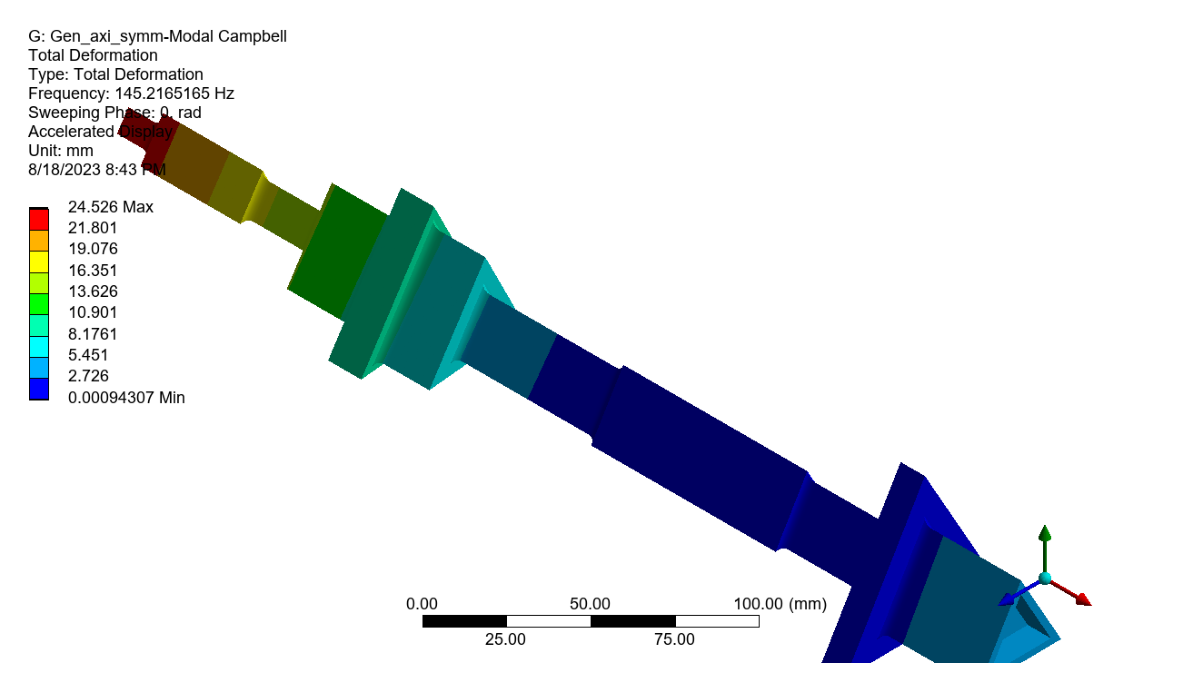

In [17]:
# Download postprocess/output images from PyMechanical working directory and display of 2D general axisymmetric rotor model

from matplotlib import image as mpimg
from matplotlib import pyplot as plt

#Specify Mechanical directory path of Modal Campbell Analysis
mechanical.run_python_script(f"image_dir=ExtAPI.DataModel.AnalysisList[2].WorkingDir")

# Verify the path for image directory.
result_image_dir_server = mechanical.run_python_script(f"image_dir")
print(f"Images are stored on the server at: {result_image_dir_server}")

# Download one image file from the server to the current working directory and plot
# using matplotlib.

def get_image_path(image_name):
    return os.path.join(result_image_dir_server, image_name)

def display_image(path):
    print(f"Printing {path} using matplotlib")
    image1 = mpimg.imread(path)
    plt.figure(figsize=(15, 15))
    plt.axis("off")
    plt.imshow(image1)
    plt.show()

image_name = "tot_deform_2D.png"
image_path_server = get_image_path(image_name)

if image_path_server != "":
    current_working_directory = os.getcwd()

    local_file_path_list = mechanical.download(
        image_path_server, target_dir=current_working_directory
    )
    image_local_path = local_file_path_list[0]
    print(f"Local image path : {image_local_path}")
    
    display_image(image_local_path)

In [18]:
# Download output file from PyMechanical working directory and print contents of 2D general axisymmetric rotor model

# Specify Mechanical directory of Unbalance response Analysis
mechanical.run_python_script(f"solve_dir=ExtAPI.DataModel.AnalysisList[3].WorkingDir")

# Verify the path for directory.
result_solve_dir_server = mechanical.run_python_script(f"solve_dir")
print(f"Solve.out file is stored on the server at: {result_solve_dir_server}")

def get_solve_path():
    return os.path.join(result_solve_dir_server, "solve.out")

def write_file_contents_to_console(path):
    """Write file contents to console."""
    with open(path, "rt") as file:
        for line in file:
            print(line, end="")

solve_out_path = get_solve_path()

if solve_out_path != "":
    current_working_directory = os.getcwd()
    mechanical.download(solve_out_path, target_dir=current_working_directory)
    solve_out_local_path = os.path.join(current_working_directory, "solve.out")
    write_file_contents_to_console(solve_out_local_path)
    os.remove(solve_out_local_path)

Solve.out file is stored on the server at: C:\Users\vnamdeo\AppData\Local\Temp\WB_vnamdeo_158652_2\wbnew_files\dp0\SYS-7\MECH\



 Ansys Mechanical Enterprise                       


 *------------------------------------------------------------------*
 |                                                                  |
 |   W E L C O M E   T O   T H E   A N S Y S (R)  P R O G R A M     |
 |                                                                  |
 *------------------------------------------------------------------*




 ***************************************************************
 *         ANSYS MAPDL 2024 R1          LEGAL NOTICES          *
 ***************************************************************
 *                                                             *
 * Copyright 1971-2024 Ansys, Inc.  All rights reserved.       *
 * Unauthorized use, distribution or duplication is            *
 * prohibited.                                                 *
 *                                                             *
 * Ansys is a registered trademark of Ansys, Inc. or its       *
 * sub

In [19]:
# start PyMechanical service then create a local PyMechanical client to solve 3D Rotor Model
mech_port = wb.run_script_file('example_03_pymech_3d.wbjn')
print("mechanical grpc started on port " + str(mech_port))
mechanical = lm(start_instance=False, ip=host, port=mech_port)
print(mechanical.project_directory)

mechanical grpc started on port 58307
C:\Users\vnamdeo\AppData\Local\Temp\WB_vnamdeo_158652_2\wbnew_files\


In [20]:
# run a Mechanical python script via PyMechanical to mesh and solve the 3d rotor model
with open (os.path.join(server_workdir, "example_03_3D_rotor.py")) as sf:
    mech_script = sf.read()
mech_output = mechanical.run_python_script(mech_script)
print(mech_output)

{"Total Deformation": "0.7770134826146281 [mm]", "Total Deformation 2": "0.95766479418025063 [mm]"}


In [21]:
# Download output file from PyMechanical working directory and print contents of 3D Rotor Model

# Specify Mechanical directory of Modal Campbell Analysis
mechanical.run_python_script(f"solve_dir=ExtAPI.DataModel.AnalysisList[2].WorkingDir")

# Verify the path for directory.
result_solve_dir_server = mechanical.run_python_script(f"solve_dir")
print(f"Solve.out file is stored on the server at: {result_solve_dir_server}")

def get_solve_path():
    return os.path.join(result_solve_dir_server, "solve.out")

def write_file_contents_to_console(path):
    """Write file contents to console."""
    with open(path, "rt") as file:
        for line in file:
            print(line, end="")

solve_out_path = get_solve_path()

if solve_out_path != "":
    current_working_directory = os.getcwd()
    mechanical.download(solve_out_path, target_dir=current_working_directory)
    solve_out_local_path = os.path.join(current_working_directory, "solve.out")
    write_file_contents_to_console(solve_out_local_path)
    os.remove(solve_out_local_path)

Solve.out file is stored on the server at: C:\Users\vnamdeo\AppData\Local\Temp\WB_vnamdeo_158652_2\wbnew_files\dp0\SYS-2\MECH\



 Ansys Mechanical Enterprise                       


 *------------------------------------------------------------------*
 |                                                                  |
 |   W E L C O M E   T O   T H E   A N S Y S (R)  P R O G R A M     |
 |                                                                  |
 *------------------------------------------------------------------*




 ***************************************************************
 *         ANSYS MAPDL 2024 R1          LEGAL NOTICES          *
 ***************************************************************
 *                                                             *
 * Copyright 1971-2024 Ansys, Inc.  All rights reserved.       *
 * Unauthorized use, distribution or duplication is            *
 * prohibited.                                                 *
 *                                                             *
 * Ansys is a registered trademark of Ansys, Inc. or its       *
 * sub

Images are stored on the server at: C:\Users\vnamdeo\AppData\Local\Temp\WB_vnamdeo_158652_2\wbnew_files\dp0\SYS-2\MECH\


Local image path : d:\users\GITs\pyworkbench-examples\examples\example_03\tot_deform_3D.png
Printing d:\users\GITs\pyworkbench-examples\examples\example_03\tot_deform_3D.png using matplotlib


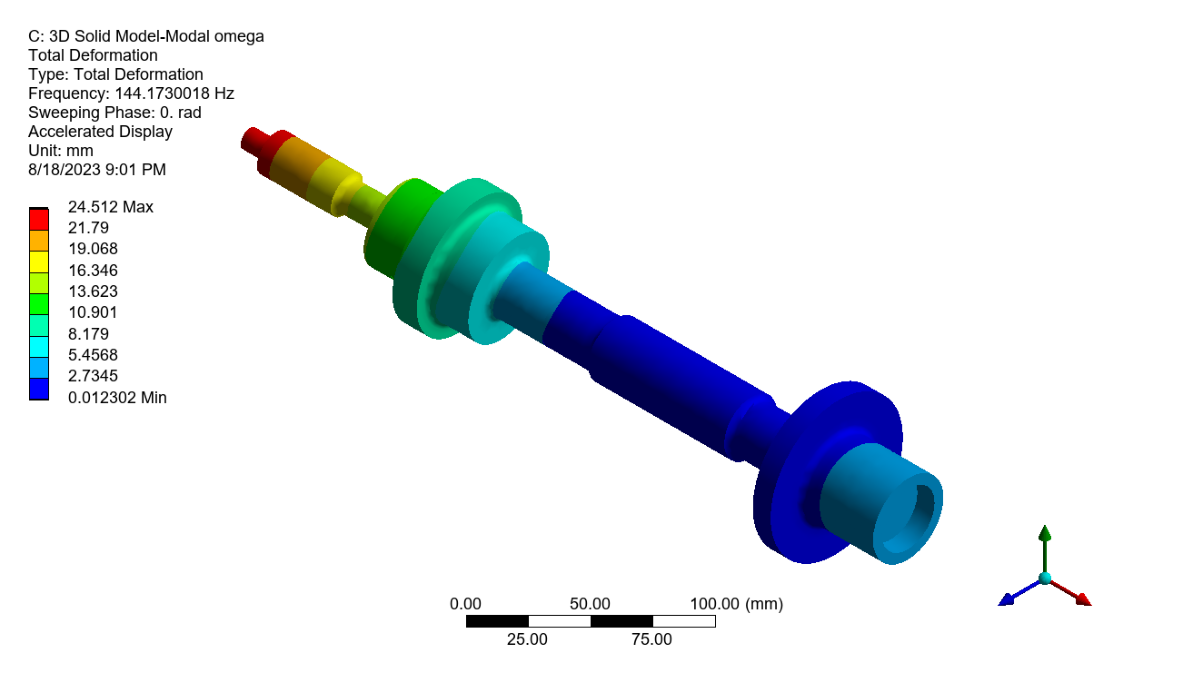

In [23]:
# Download postprocess/output images from PyMechanical working directory and display of 3D rotor model

from matplotlib import image as mpimg
from matplotlib import pyplot as plt

#Specify Mechanical directory path of Modal Campbell Analysis
mechanical.run_python_script(f"image_dir=ExtAPI.DataModel.AnalysisList[2].WorkingDir")

# Verify the path for image directory.
result_image_dir_server = mechanical.run_python_script(f"image_dir")
print(f"Images are stored on the server at: {result_image_dir_server}")

# Download one image file from the server to the current working directory and plot
# using matplotlib.

def get_image_path(image_name):
    return os.path.join(result_image_dir_server, image_name)

def display_image(path):
    print(f"Printing {path} using matplotlib")
    image1 = mpimg.imread(path)
    plt.figure(figsize=(15, 15))
    plt.axis("off")
    plt.imshow(image1)
    plt.show()

image_name = "tot_deform_3D.png"
image_path_server = get_image_path(image_name)

if image_path_server != "":
    current_working_directory = os.getcwd()

    local_file_path_list = mechanical.download(
        image_path_server, target_dir=current_working_directory
    )
    image_local_path = local_file_path_list[0]
    print(f"Local image path : {image_local_path}")
    
    display_image(image_local_path)

In [22]:
# Download output file from PyMechanical working directory and print contents of 3D Rotor Model

# Specify Mechanical directory of Unbalance Response Analysis
mechanical.run_python_script(f"solve_dir=ExtAPI.DataModel.AnalysisList[3].WorkingDir")

# Verify the path for directory.
result_solve_dir_server = mechanical.run_python_script(f"solve_dir")
print(f"Solve.out file is stored on the server at: {result_solve_dir_server}")

def get_solve_path():
    return os.path.join(result_solve_dir_server, "solve.out")

def write_file_contents_to_console(path):
    """Write file contents to console."""
    with open(path, "rt") as file:
        for line in file:
            print(line, end="")

solve_out_path = get_solve_path()

if solve_out_path != "":
    current_working_directory = os.getcwd()
    mechanical.download(solve_out_path, target_dir=current_working_directory)
    solve_out_local_path = os.path.join(current_working_directory, "solve.out")
    write_file_contents_to_console(solve_out_local_path)
    os.remove(solve_out_local_path)

Solve.out file is stored on the server at: C:\Users\vnamdeo\AppData\Local\Temp\WB_vnamdeo_158652_2\wbnew_files\dp0\SYS-3\MECH\



 Ansys Mechanical Enterprise                       


 *------------------------------------------------------------------*
 |                                                                  |
 |   W E L C O M E   T O   T H E   A N S Y S (R)  P R O G R A M     |
 |                                                                  |
 *------------------------------------------------------------------*




 ***************************************************************
 *         ANSYS MAPDL 2024 R1          LEGAL NOTICES          *
 ***************************************************************
 *                                                             *
 * Copyright 1971-2024 Ansys, Inc.  All rights reserved.       *
 * Unauthorized use, distribution or duplication is            *
 * prohibited.                                                 *
 *                                                             *
 * Ansys is a registered trademark of Ansys, Inc. or its       *
 * sub

In [ ]:
# Download all the files from the server to the current working directory of 3D rotor model
# set working directory accordingly

import shutil
import glob

current_working_directory = os.getcwd()
target_dir2 = current_working_directory
# Verify the target path to copy the files.
print(f"Files to be copied from server path at: {target_dir2}")

# Verify the source path for directory.
print(f"All the solver file is stored on the server at: {result_solve_dir_server}")

source_dir = result_solve_dir_server
destination_dir = target_dir2
# Copy all the files
for file in glob.glob(source_dir + '/*'):
    shutil.copy(file, destination_dir)

In [ ]:
# shutdown the Workbench client and service
wb.exit()